## Diabetes Prediction
Name: Youssef Ayman Mohamed
<br>
RegNum: 211000348

## Glossary
1. [Import Libraries](#import-libararies)
<br>
2. [Data Collection and Statical Analysis](#data-collection-and-statical-analysis)
<br>
3. [Data Cleaning](#data-cleaning)
<br>
4. [Data Visualization](#data-visualization)
<br>
5. [SVM (Support Vector Machine)](#svm-support-vector-machine)
<br>
6. [Logistic Regression](#logistic-regression)
<br>
7. [Random Forest](#random-forest)
<br>
8. [Decision Tree](#decision-tree)
<br>
9. [Models Comparison](#models-comparison)




## Import Libararies <a id='import'>

Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score,precision_score


## Data Collection And Statical Analysis

1-Importing the dataset and showing the first 10 rows 
<br>
2-Getting Statical Analysis
<br>
3- counting the data according to outcome

In [2]:
#import the dataset
diabetes_prediction = pd.read_csv("./diabetes_prediction_dataset.csv")
diabetes_prediction.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
diabetes_prediction.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99982.0,41.888076,22.517206,0.08,24.00,43.00,60.00,80.00
hypertension,99982.0,0.074863,0.263172,0.00,0.00,0.00,0.00,1.00
heart_disease,99982.0,0.039427,0.194610,0.00,0.00,0.00,0.00,1.00
bmi,99982.0,27.320757,6.636853,10.01,23.63,27.32,29.58,95.69
HbA1c_level,99982.0,5.527529,1.070665,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,99982.0,138.057810,40.709469,80.00,100.00,140.00,159.00,300.00
diabetes,99982.0,0.085015,0.278906,0.00,0.00,0.00,0.00,1.00


In [4]:
print("0-> Non-Diabetic")
print("1-> Diabetic")
print(diabetes_prediction['diabetes'].value_counts())

0-> Non-Diabetic
1-> Diabetic
diabetes
0    91482
1     8500
Name: count, dtype: int64


## Data Cleaning

Missing Values

In [5]:
#check for null values
diabetes_prediction.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Duplicate handeling

seeing duplicate values then removing it 

In [6]:
duplicate_rows_data = diabetes_prediction[diabetes_prediction.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [7]:
diabetes_prediction = diabetes_prediction.drop_duplicates()

Uniqueness

seeing the unique values en every columns

In [8]:
for column in diabetes_prediction.columns:
    num_distinct_values = len(diabetes_prediction[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 2 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


split the dataset from the outcome

In [9]:
X = diabetes_prediction.drop(columns= 'diabetes', axis=1)
Y = diabetes_prediction['diabetes']

In [10]:
print(X)
print

       gender   age  hypertension  heart_disease smoking_history    bmi   
0      Female  80.0             0              1           never  25.19  \
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99976  Female  36.0             0              0         No Info  24.60   
99978  Female   2.0             0              0         No Info  17.37   
99979    Male  66.0             0              0          former  27.83   
99980  Female  24.0             0              0           never  35.42   
99981  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

<function print>

## Data visualization

visualizing data to see the it clearly

**Univariate Exploration**

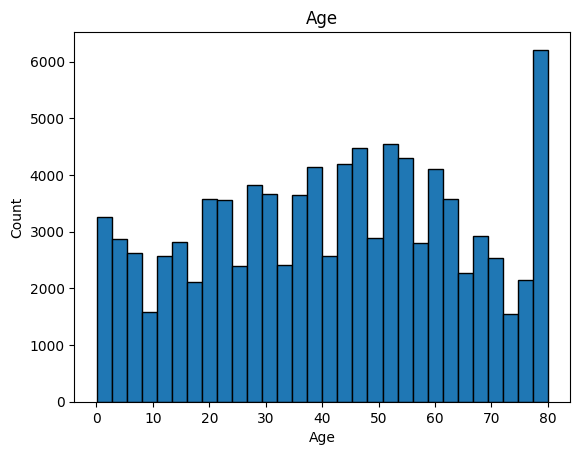

In [11]:
plt.hist(diabetes_prediction['age'], bins=30, edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

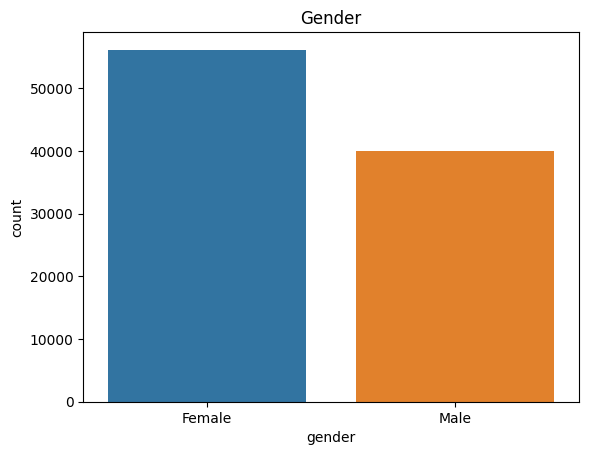

In [12]:
sns.countplot(x='gender', data=diabetes_prediction)
plt.title('Gender')
plt.show()

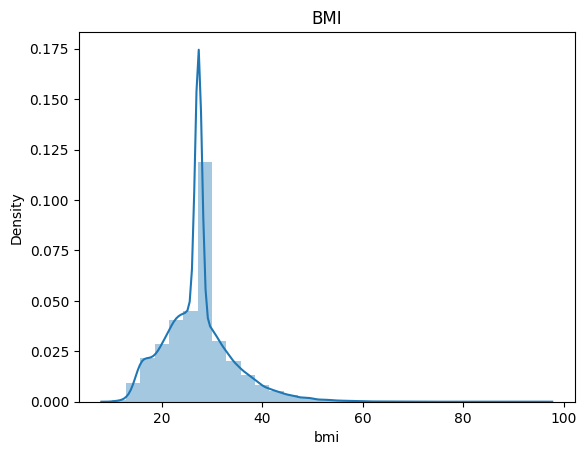

In [13]:
sns.distplot(diabetes_prediction['bmi'], bins=30)
plt.title('BMI')
plt.show();

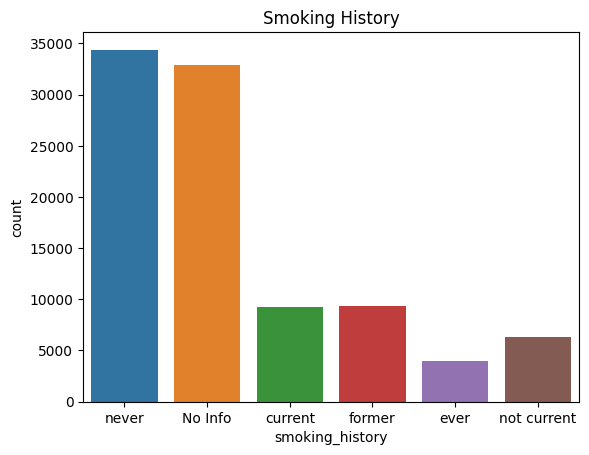

In [14]:
sns.countplot(x='smoking_history', data=diabetes_prediction)
plt.title('Smoking History')
plt.show()

Count plots for binary variables

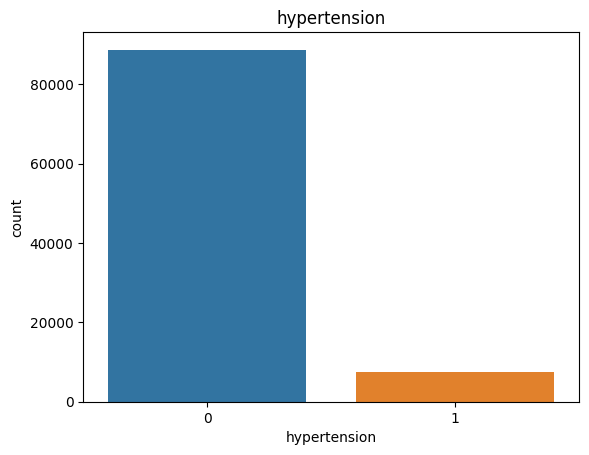

In [15]:
sns.countplot(x='hypertension', data=diabetes_prediction)
plt.title('hypertension')
plt.show()

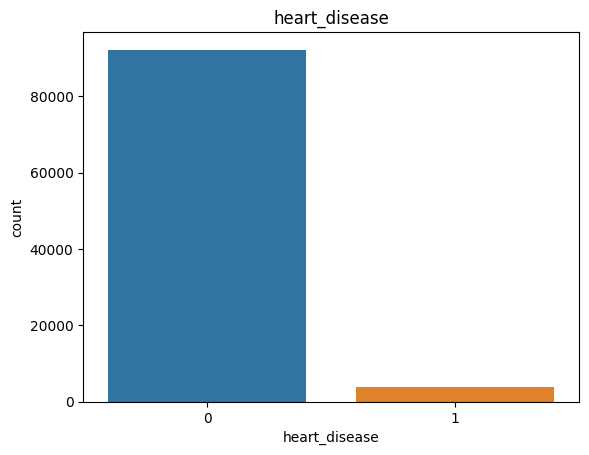

In [16]:
sns.countplot(x='heart_disease', data=diabetes_prediction)
plt.title('heart_disease')
plt.show()

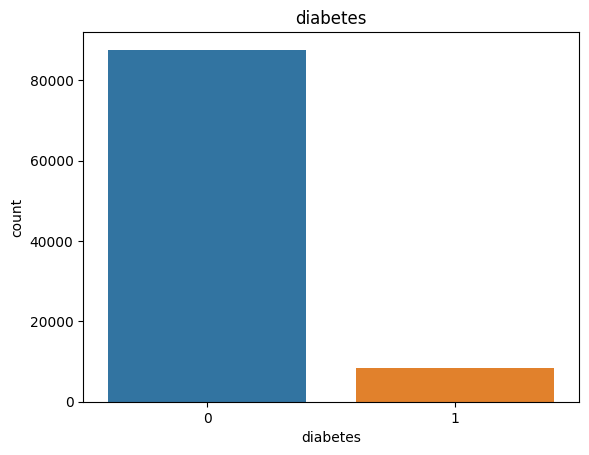

In [17]:
sns.countplot(x='diabetes', data=diabetes_prediction)
plt.title('diabetes')
plt.show()

**Bivariate Exploration**

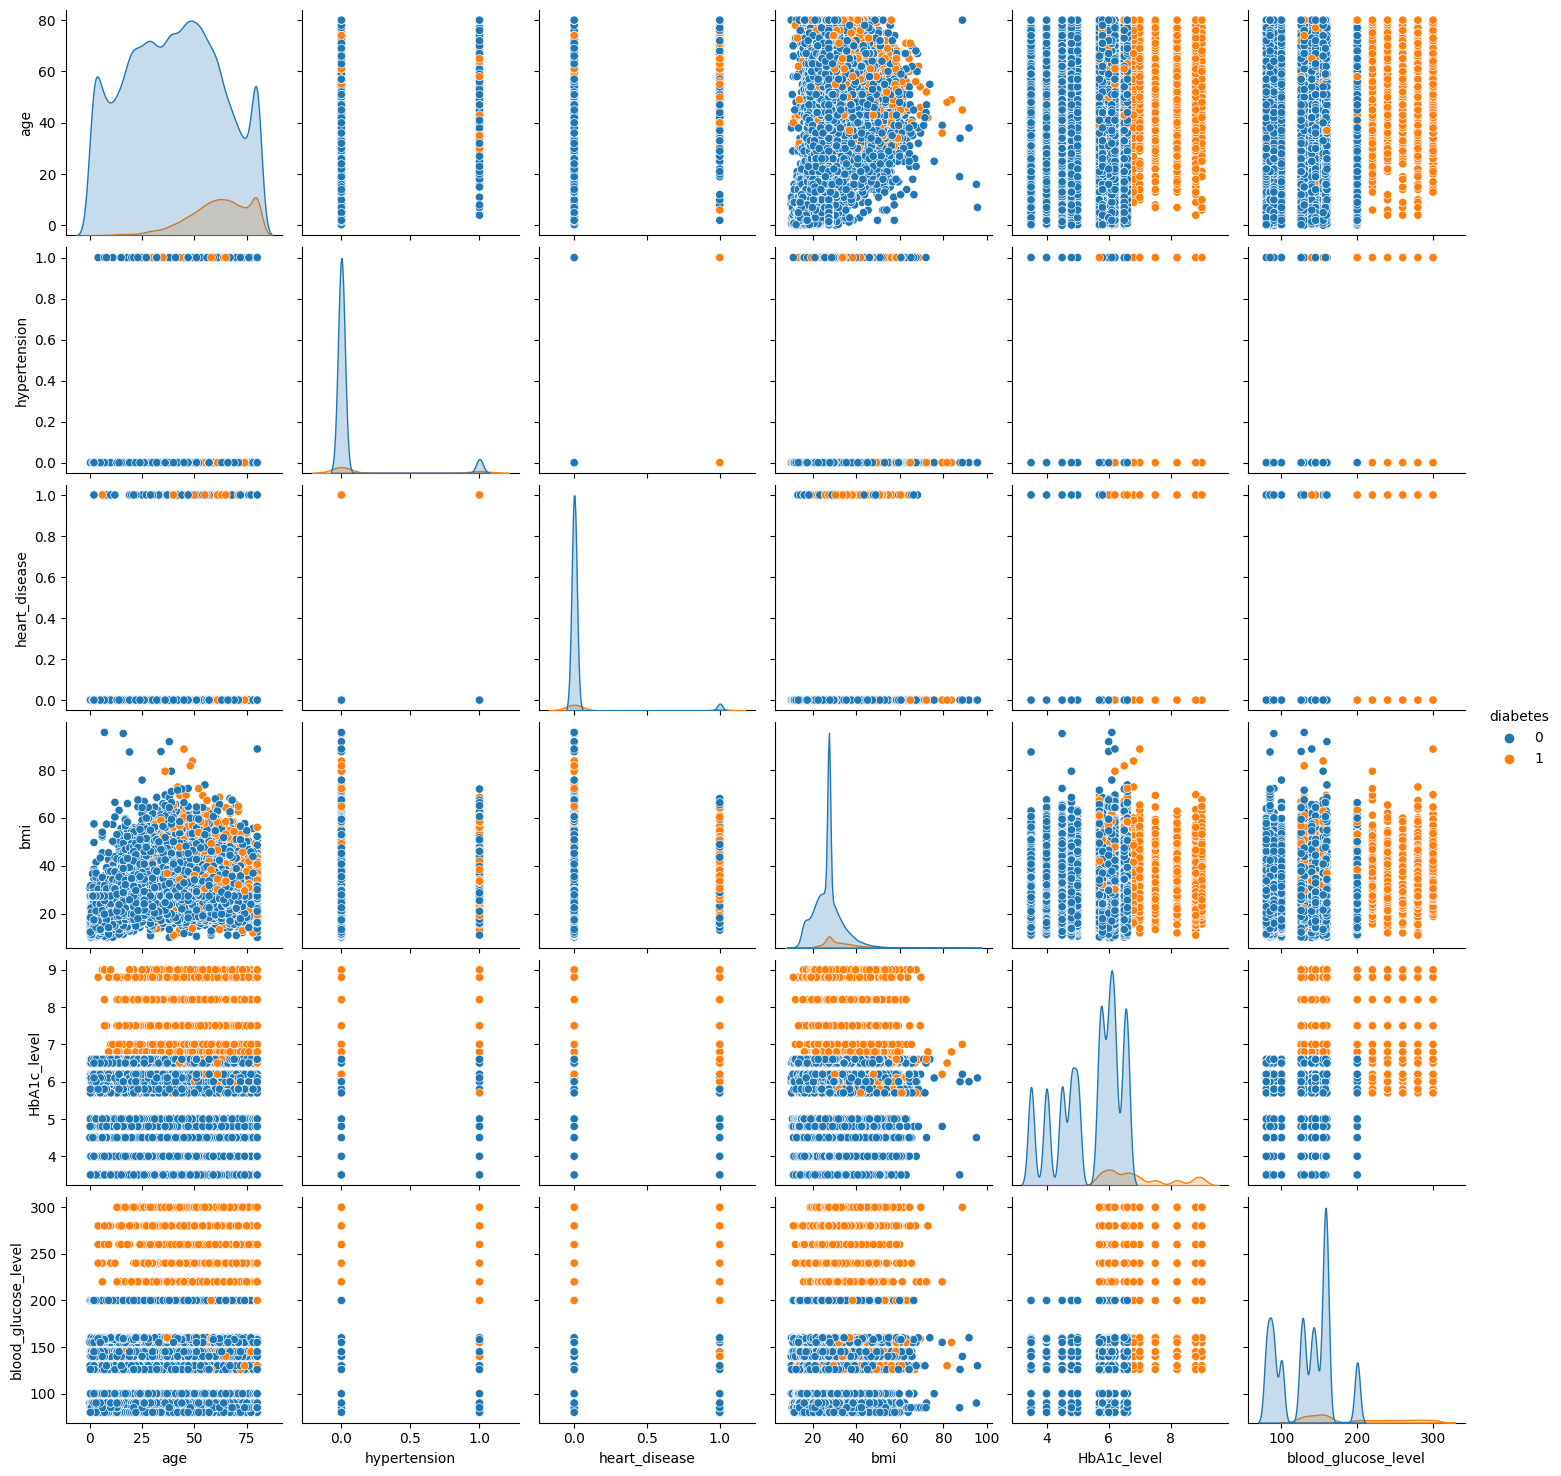

In [18]:
sns.pairplot(diabetes_prediction, hue='diabetes')
plt.show()

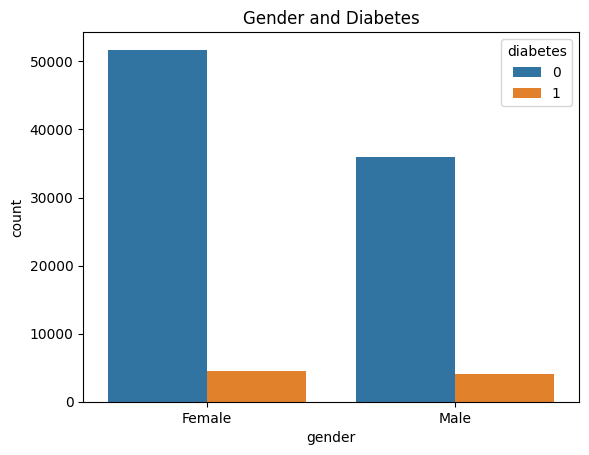

In [19]:
sns.countplot(x='gender', hue='diabetes', data=diabetes_prediction)
plt.title('Gender and Diabetes')
plt.show()

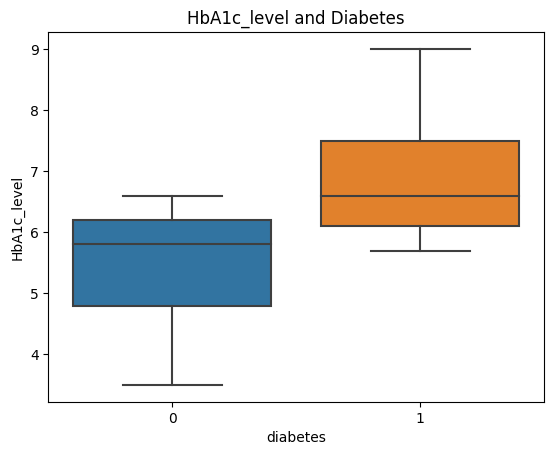

In [20]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes_prediction)
plt.title('HbA1c_level and Diabetes')
plt.show()

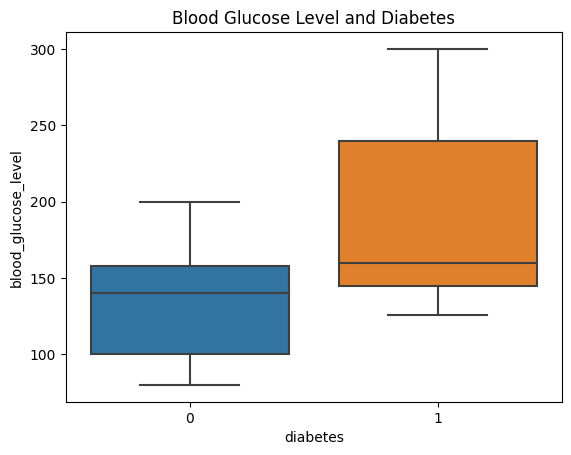

In [21]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes_prediction)
plt.title('Blood Glucose Level and Diabetes')
plt.show()

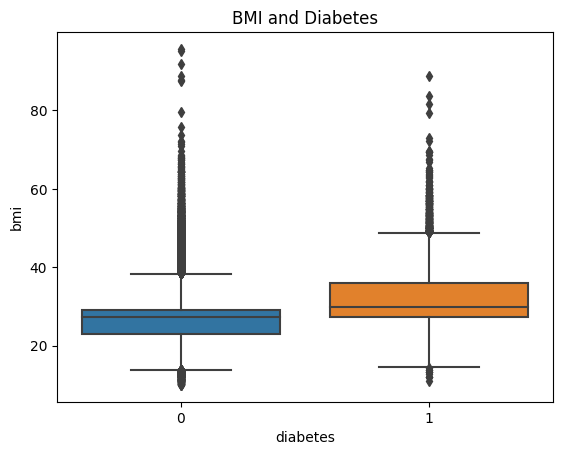

In [22]:
sns.boxplot(x='diabetes', y='bmi', data=diabetes_prediction)
plt.title('BMI and Diabetes')
plt.show()

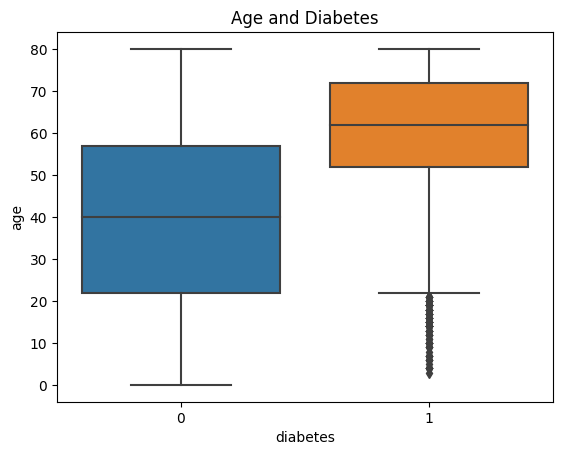

In [23]:
sns.boxplot(x='diabetes', y='age', data=diabetes_prediction)
plt.title('Age and Diabetes')
plt.show()

**Multivariate Exploration**

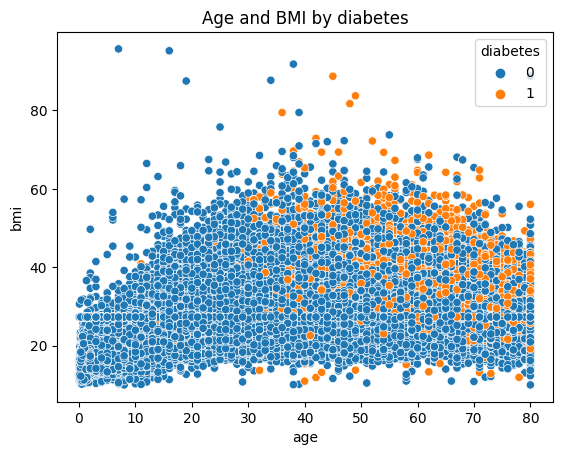

In [24]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=diabetes_prediction)
plt.title('Age and BMI by diabetes')
plt.show()

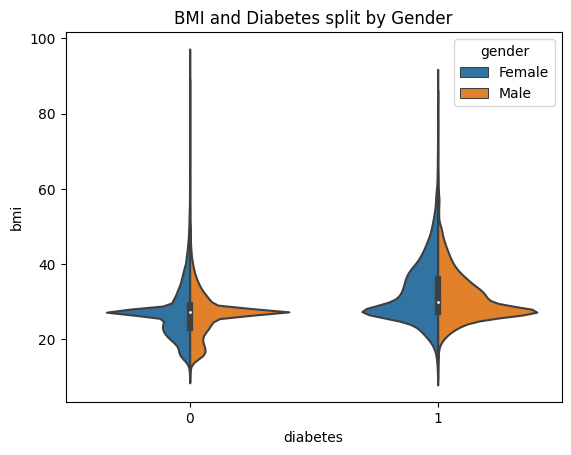

In [25]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=diabetes_prediction)
plt.title('BMI and Diabetes split by Gender')
plt.show()

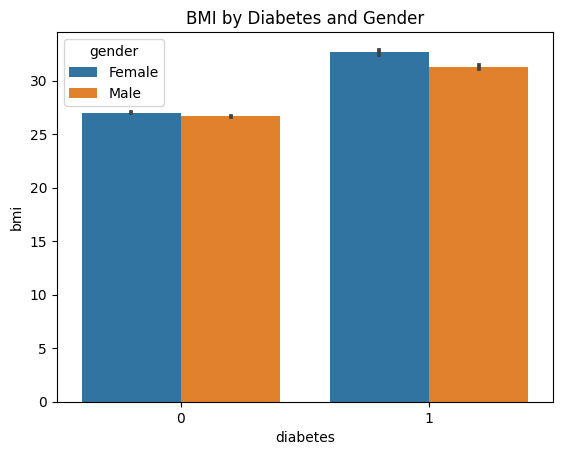

In [26]:
sns.barplot(x='diabetes', y='bmi', hue='gender', data=diabetes_prediction)
plt.title('BMI by Diabetes and Gender')
plt.show()

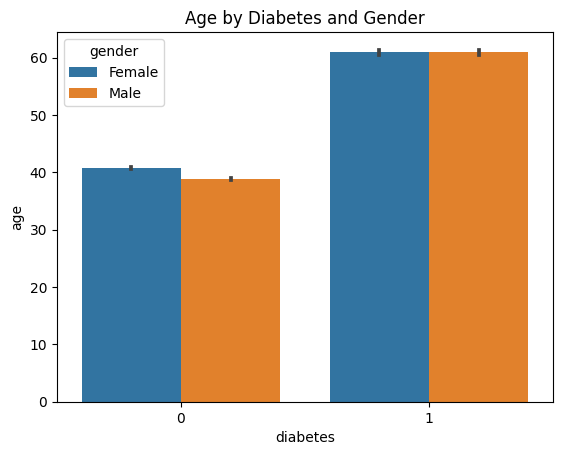

In [27]:
sns.barplot(x='diabetes', y='age', hue='gender', data=diabetes_prediction)
plt.title('Age by Diabetes and Gender')
plt.show()

## Data Preprocessing and Standerization

**Data preparation**

mapping existing catigories to new one to make it easy to normalize

In [28]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
diabetes_prediction['smoking_history'] = diabetes_prediction['smoking_history'].apply(recategorize_smoking)

# new values count
print(diabetes_prediction['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


converting the data into standard formate that the computer can easily use and understand

**Encoding**

encoding data to make it easy for the models to classify using one_hot_encoding by changing the string to binary clasification to make it easy

In [29]:
data = diabetes_prediction.copy()

In [30]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [31]:
# Create an instance of the StandardScaler
X = data.drop('diabetes', axis=1)
y = data['diabetes']
scaler = StandardScaler()

Feature scaling is a preprocessing step that helps bring different features or variables to a similar scale, which can be beneficial for many machine learning algorithms. It ensures that no particular feature dominates the learning process or is treated as more important simply due to its scale.

In [32]:
# Compute the scaling parameters based on the dataset X
scaler.fit(X)

StandardScaler()

scaler.transform(X) is used to transform the dataset X using the scaling parameters computed by the scaler object. The transformed data, standardized_data, will have the same shape as the original dataset X, but with each feature scaled according to the parameters computed during the fitting step

In [33]:
# Transform the dataset X using the computed scaling parameters
standardized_data = scaler.transform(X)

In [34]:
print(standardized_data)

[[ 1.7007088  -0.29007982  4.84806107 ... -0.32526382  0.6548742
  -0.50697023]
 [ 0.5432608  -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 [-0.6141872  -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 ...
 [ 1.07746757 -0.29007982 -0.20626803 ... -0.32526382 -1.52701084
   1.9725024 ]
 [-0.79225612 -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 [ 0.67681249 -0.29007982 -0.20626803 ...  3.07442742 -1.52701084
  -0.50697023]]


In [35]:
X = standardized_data
Y = diabetes_prediction['diabetes']
print(X)
print(Y)

[[ 1.7007088  -0.29007982  4.84806107 ... -0.32526382  0.6548742
  -0.50697023]
 [ 0.5432608  -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 [-0.6141872  -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 ...
 [ 1.07746757 -0.29007982 -0.20626803 ... -0.32526382 -1.52701084
   1.9725024 ]
 [-0.79225612 -0.29007982 -0.20626803 ... -0.32526382  0.6548742
  -0.50697023]
 [ 0.67681249 -0.29007982 -0.20626803 ...  3.07442742 -1.52701084
  -0.50697023]]
0        0
1        0
2        0
3        0
4        0
        ..
99976    0
99978    0
99979    0
99980    0
99981    0
Name: diabetes, Length: 96128, dtype: int64


**Data Spliting**

X_train: The training set features, which will be used for model training.<br>
X_test: The test set features, which will be used for model evaluation.<br>
Y_train: The corresponding labels for the training set.<br>
Y_test: The corresponding labels for the test set.<br>

In [36]:
#spliting data into 20% testing and 80% training
#stratify: splitting process will preserve the relative class frequencies of the target variable in the train and test sets
#It ensures that the distribution of classes in the original dataset is maintained in both sets.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_test.shape, X_train.shape)

(96128, 11) (19226, 11) (76902, 11)


## SVM (Support Vector Machine)

Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that separates different classes by maximizing the margin between the data points and the hyperplane.

In [37]:
classifier = svm.SVC(kernel='linear')

In [38]:

clf = classifier.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17530
           1       0.91      0.61      0.73      1696

    accuracy                           0.96     19226
   macro avg       0.94      0.80      0.86     19226
weighted avg       0.96      0.96      0.96     19226



In [53]:
accuracy_svm = accuracy_score(Y_test, predictions)
f1_score_svm = f1_score(Y_test, predictions)
precision_score_svm = precision_score(Y_test, predictions)
print('Accuracy: ',accuracy_svm)
print('Precision: ',precision_score_svm)
print('F1-Score',f1_score_svm)

Accuracy:  0.9606262353063559
Precision:  0.9129287598944591
F1-Score 0.7327920931874338


**Grid Search**

Grid search is a technique used for hyperparameter tuning in machine learning. It systematically searches through a predefined set of hyperparameter combinations to find the optimal configuration for a model.

In [39]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [40]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9628358337161119


**K-Fold**

K-fold cross-validation is a technique used to evaluate the performance of a machine learning model. It involves splitting the dataset into k equal-sized folds.
The model is trained on k-1 folds and evaluated on the remaining fold, repeating the process k times. This helps assess the model's generalization ability and reduce the impact of randomness in the data.

In [41]:
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(classifier,X_train,Y_train,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(classifier,X_test,Y_test,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.95689487 0.9578701  0.96072822 0.96118336 0.95838752]
Average Cross Validation Score=0.9590128118989627

Testing Dataset
Cross Validation Scores=[0.96073843 0.95552666 0.95994798 0.96254876 0.96254876]
Average Cross Validation Score=0.9602621202377353


In [42]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [43]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17530
           1       0.98      0.62      0.76      1696

    accuracy                           0.96     19226
   macro avg       0.97      0.81      0.87     19226
weighted avg       0.97      0.96      0.96     19226



## Logistic Regression

Logistic regression is a binary classification algorithm that predicts the probability of an instance belonging to a particular class.

**Grid Search**

In [44]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1)
logreg_cv.fit(X_train,Y_train)
pre = logreg_cv.predict(X_test)

print("tuned hpyerparameters(best parameters): ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters(best parameters):  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9584666369875858


In [54]:
accuracy_logreg = accuracy_score(Y_test, predictions)
f1_score_logreg = f1_score(Y_test, predictions)
precision_score_logreg = precision_score(Y_test, predictions)
print('Accuracy: ',accuracy_logreg)
print('Precision: ',precision_score_logreg)
print('F1-Score',f1_score_logreg)

Accuracy:  0.9606262353063559
Precision:  0.9129287598944591
F1-Score 0.7327920931874338


**K-Fold**

In [45]:
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(logreg,X_train,Y_train,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(logreg,X_test,Y_test,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.95637475 0.95774007 0.95877763 0.96046814 0.95845254]
Average Cross Validation Score=0.9583626252949677

Testing Dataset
Cross Validation Scores=[0.96151846 0.95396619 0.96046814 0.96176853 0.96072822]
Average Cross Validation Score=0.9596899080124454


In [46]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,Y_train)
print("score",logreg2.score(X_test,Y_test))

score 0.9593259128263809


In [47]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17530
           1       0.91      0.61      0.73      1696

    accuracy                           0.96     19226
   macro avg       0.94      0.80      0.86     19226
weighted avg       0.96      0.96      0.96     19226



## Random Forest

Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It creates a forest of randomized decision trees.
Each tree is trained on a different random subset of the data and features, resulting in a diverse set of trees.
During prediction, each tree votes on the final outcome, and the class with the majority of votes is selected.

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
forest = rfc.predict(X_test)
rfc.score(X_test, Y_test)

0.9695724539685842

In [52]:
accuracy_forest = accuracy_score(Y_test, forest)
f1_score_forest = f1_score(Y_test, forest)
precision_score_forest = precision_score(Y_test, forest)
print('Accuracy: ',accuracy_forest)
print('Precision: ',precision_score_forest)
print('F1-Score',f1_score_forest)

Accuracy:  0.9695724539685842
Precision:  0.9276366435719784
F1-Score 0.8046744574290483


<Axes: >

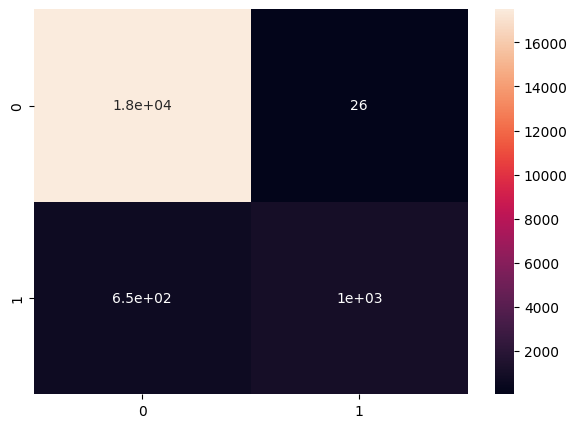

In [49]:
mat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

Grid Search

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, Y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [73]:
print(best_params)
print(best_score)

{'max_depth': 5, 'min_samples_split': 2}
0.9702608456940567


K-Fold

In [66]:
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(rfc,X_train,Y_train,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(rfc,X_test,Y_test,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.96840257 0.96729731 0.96846554 0.96820546 0.96547464]
Average Cross Validation Score=0.9675691066334269

Testing Dataset
Cross Validation Scores=[0.97035881 0.96931079 0.97191157 0.97139142 0.97295189]
Average Cross Validation Score=0.9711848968106969


## Decision Tree

Decision Tree is a supervised learning algorithm that creates a tree-like model for classification or regression tasks.
It splits the data based on features, aiming to maximize information gain or minimize impurity at each node.
The tree structure allows for easy interpretation and decision-making, as each leaf node represents a class or a predicted value.
Decision Trees can handle both categorical and numerical data, and are often used for tasks such as customer segmentation, fraud detection, and medical diagnosis.

In [50]:
decisiontree = tree.DecisionTreeClassifier(random_state = 42)
decisiontree = decisiontree.fit(X_train, Y_train)

target_pred = decisiontree.predict(X_test)
accuracy_tree = accuracy_score(Y_test, target_pred)
f1_score_tree = f1_score(Y_test, target_pred)
precision_score_tree = precision_score(Y_test, target_pred)
print('Accuracy: ',accuracy_tree)
print('Precision: ',precision_score_tree)
print('F1-Score',f1_score_tree)


Accuracy:  0.9487152813897847
Precision:  0.695054945054945
F1-Score 0.7195676905574516


Grid Search

In [67]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of the decision tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decisiontree, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [74]:
print(best_params)
print(best_score)

{'max_depth': 5, 'min_samples_split': 2}
0.9702608456940567


K-Fold

In [68]:
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(decisiontree,X_train,Y_train,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(decisiontree,X_test,Y_test,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.95130356 0.9506534  0.94759428 0.94895969 0.94856957]
Average Cross Validation Score=0.9494160993893382

Testing Dataset
Cross Validation Scores=[0.94617785 0.95110533 0.95318596 0.95162549 0.95110533]
Average Cross Validation Score=0.9506399907491747


## Models Comparison

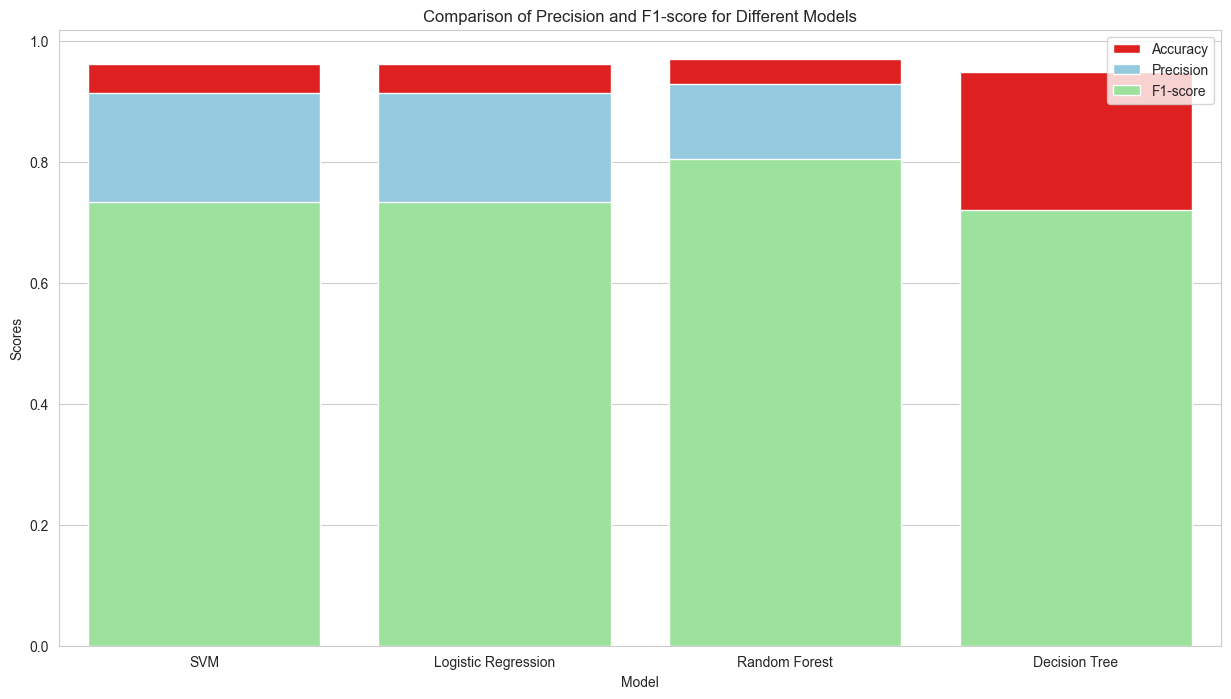

In [63]:
precision = [precision_score_svm, precision_score_logreg,precision_score_forest,precision_score_tree]
f1_score = [f1_score_svm,f1_score_logreg,f1_score_forest,f1_score_tree]
Accuracy = [accuracy_svm,accuracy_logreg,accuracy_forest,accuracy_tree]
models = ['SVM', 'Logistic Regression', 'Random Forest','Decision Tree']

# Create a DataFrame with the data
data = pd.DataFrame({'Precision': precision, 'F1-score': f1_score, 'Accuracy':Accuracy,'Model': models})

sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Accuracy', data=data, color='red', label='Accuracy')
sns.barplot(x='Model', y='Precision', data=data, color='skyblue', label='Precision')
sns.barplot(x='Model', y='F1-score', data=data, color='lightgreen', label='F1-score')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Precision and F1-score for Different Models')
plt.legend()
plt.show()
